In [57]:
import pandas as pd
import numpy as np
import altair as alt
from tqdm import tqdm
import graphviz
alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

In [47]:
df = pd.read_csv(r"C:\Users\Administrator\Repositories\logdeep_measurable\result\deeplog\times_result_1672700876.3288977.csv")

In [49]:
df1 = pd.read_csv(r"C:\Users\Administrator\Repositories\GreenSecurity-FirstExperiment\Dell Inc. Latitude Latitude 7430 Windows 10\LogAnomalyDetection\Power Saver Plan\One Scan\Measurement 48\processes_data.csv")

In [50]:
time_unit = (df['end_time'] - df['start_time']).mean()

In [51]:
df1['Time(sec)'].diff().mean()/time_unit

92.10115203116261

<AxesSubplot: xlabel='Time(sec)'>

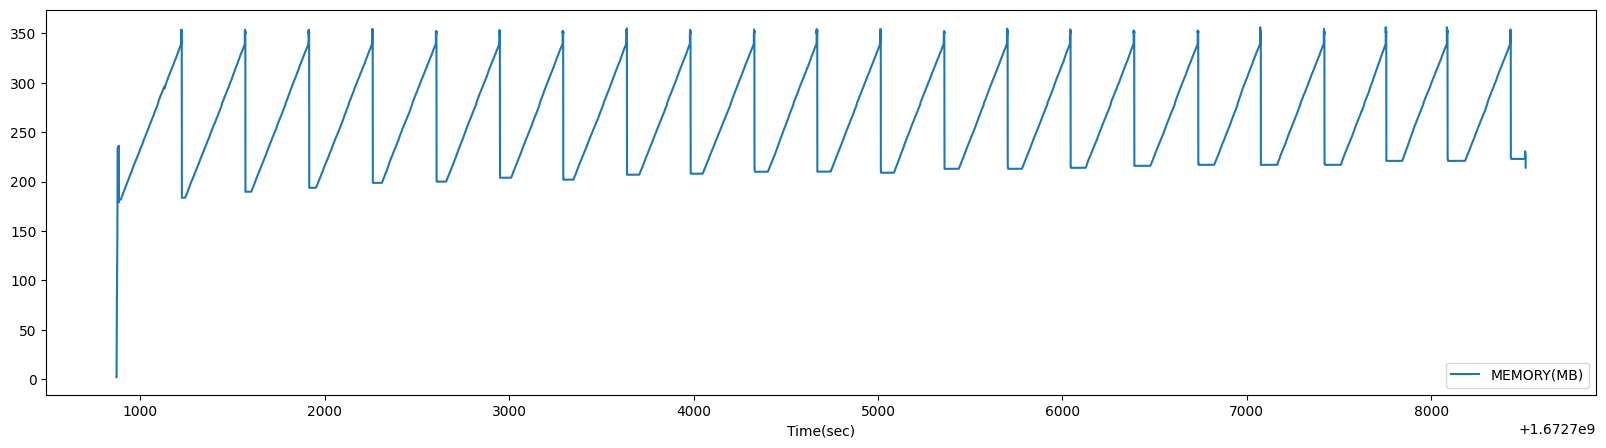

In [52]:
df1.plot(y='MEMORY(MB)', x='Time(sec)', figsize=(20,5))


In [53]:
import ast
df['logs_seq'] = df['logs_seq'].apply(lambda x: tuple(ast.literal_eval(x)))
df['new_log'] = df['new_log'].apply(lambda x: ast.literal_eval(x)[0])
df

,Unnamed: 0,start_time,logs_seq,new_log,dataset_type,end_time
0,0,1.672701e+09,"(4.0, 4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10...",25,normal,1.672701e+09
1,1,1.672701e+09,"(4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8...",25,normal,1.672701e+09
2,2,1.672701e+09,"(4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 2...",25,normal,1.672701e+09
3,3,1.672701e+09,"(21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, ...",22,normal,1.672701e+09
4,4,1.672701e+09,"(10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 25.0, ...",22,normal,1.672701e+09
...,...,...,...,...,...,...
4447140,757,1.672709e+09,"(4.0, 21.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",-1,abnormal,1.672709e+09
4447141,758,1.672709e+09,"(4.0, 21.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",-1,abnormal,1.672709e+09
4447142,759,1.672709e+09,"(4.0, 21.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",-1,abnormal,1.672709e+09
4447143,760,1.672709e+09,"(4.0, 21.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",-1,abnormal,1.672709e+09


In [58]:
for i, row in tqdm(df1.iterrows()):
    cpu = row["CPU(%)"]
    start_time_df1 = row["Time(sec)"]
    if i == len(df1)-1:
        end_time_df1 = start_time_df1 + 5
    else:
        end_time_df1 = df1.iloc[i+1]["Time(sec)"]
    view = df[(df["start_time"]>=start_time_df1)&(df["end_time"]<end_time_df1)]
    if len(view):
        df.loc[view.index, "cpu"] = cpu#/len(view)
df["time"] = df["end_time"] - df.iloc[0]["start_time"]

53733it [46:29, 19.27it/s]


In [67]:
np.where(((df["start_time"].values>=1.672724*(10**9))&(df["end_time"].values<=1.672724*(10**9))))

(array([], dtype=int64),)

In [ ]:
# df[df['cpu']>0.5]

In [63]:
df

,Unnamed: 0,start_time,logs_seq,new_log,dataset_type,end_time,cpu,time
0,0,1.672701e+09,"(4.0, 4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10...",25,normal,1.672701e+09,4.77,0.020999
1,1,1.672701e+09,"(4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8...",25,normal,1.672701e+09,4.77,0.026999
2,2,1.672701e+09,"(4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 2...",25,normal,1.672701e+09,4.77,0.027999
3,3,1.672701e+09,"(21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, ...",22,normal,1.672701e+09,4.77,0.030000
4,4,1.672701e+09,"(10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 25.0, ...",22,normal,1.672701e+09,4.77,0.030999
...,...,...,...,...,...,...,...,...
4447140,757,1.672709e+09,"(4.0, 21.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",-1,abnormal,1.672709e+09,NaN,7627.657968
4447141,758,1.672709e+09,"(4.0, 21.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",-1,abnormal,1.672709e+09,8.28,7627.661332
4447142,759,1.672709e+09,"(4.0, 21.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",-1,abnormal,1.672709e+09,8.28,7627.662675
4447143,760,1.672709e+09,"(4.0, 21.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",-1,abnormal,1.672709e+09,8.28,7627.666064


In [11]:
q = df["cpu"].quantile(0.99)
df = df[df["cpu"] < q]

KeyError: 'cpu'

In [ ]:
df.cpu = df.cpu.fillna(df.cpu.mean())

In [ ]:
len(df1['CPU(%)'].unique())

71

In [59]:
dfg = df.groupby(['dataset_type', 'logs_seq', 'new_log']).mean().reset_index()
dfg

,dataset_type,logs_seq,new_log,Unnamed: 0,start_time,end_time,cpu,time
0,abnormal,"(3.0, 2.0, 1.0, 22.0, 22.0, 22.0, 20.0, 20.0, ...",20,81.500000,1.672709e+09,1.672709e+09,8.333000,7626.352016
1,abnormal,"(3.0, 3.0, 2.0, 1.0, 22.0, 22.0, 22.0, 20.0, 2...",25,80.500000,1.672709e+09,1.672709e+09,8.333000,7626.350113
2,abnormal,"(4.0, 4.0, 21.0, 4.0, 10.0, 8.0, 10.0, 8.0, 10...",25,67.500000,1.672709e+09,1.672709e+09,8.338000,7626.326714
3,abnormal,"(4.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 2...",3,70.500000,1.672709e+09,1.672709e+09,8.338000,7626.332313
4,abnormal,"(4.0, 21.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",-1,455.500000,1.672709e+09,1.672709e+09,8.532930,7627.057643
...,...,...,...,...,...,...,...,...
4555,normal,"(25.0, 25.0, 25.0, 10.0, 10.0, 8.0, 22.0, 22.0...",20,28762.500000,1.672708e+09,1.672708e+09,8.002500,7252.849249
4556,normal,"(25.0, 25.0, 25.0, 21.0, 2.0, 2.0, 2.0, 2.0, 2...",2,185357.000000,1.672708e+09,1.672708e+09,7.290000,7519.259646
4557,normal,"(25.0, 25.0, 25.0, 21.0, 4.0, 10.0, 8.0, 2.0, ...",22,171097.000000,1.672708e+09,1.672708e+09,7.170000,7150.864090
4558,normal,"(25.0, 25.0, 25.0, 24.0, 17.0, 4.0, 5.0, 15.0,...",20,123711.312303,1.672708e+09,1.672708e+09,7.511736,6765.543800


array([<AxesSubplot: title={'center': 'abnormal'}>,
       <AxesSubplot: title={'center': 'normal'}>], dtype=object)

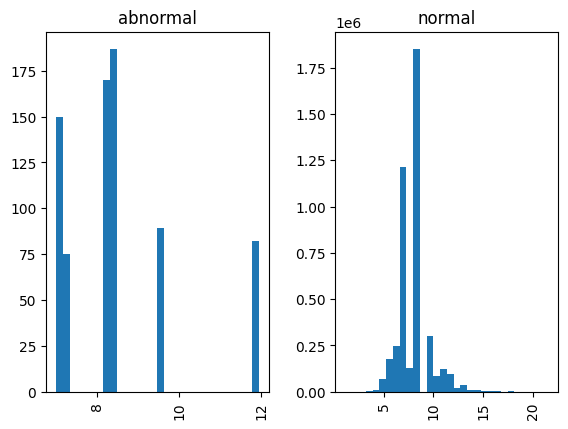

In [60]:
df.hist( column='cpu', by='dataset_type',bins=30)

In [42]:
dfp = df.pivot_table(index='cpu', columns='dataset_type', aggfunc='count', values='end_time')
# dfp = dfp.fillna(0)

In [43]:
dfp

dataset_type,abnormal,normal
cpu,,
2.37,NaN,57.0
2.39,NaN,201.0
2.77,NaN,451.0
3.55,NaN,764.0
3.58,NaN,1162.0
...,...,...
18.01,NaN,63.0
18.94,NaN,63.0
19.39,NaN,126.0


In [44]:
dfp = dfp.reset_index().melt(['cpu']).dropna()

In [45]:
dfp

,cpu,dataset_type,value
9,4.77,abnormal,250.0
10,5.21,abnormal,77.0
11,5.54,abnormal,379.0
13,5.92,abnormal,568.0
14,5.98,abnormal,680.0
...,...,...,...
131,18.01,normal,63.0
132,18.94,normal,63.0
133,19.39,normal,126.0
134,20.31,normal,100.0


In [46]:
alt.Chart(dfp).mark_bar(
    binSpacing=0).encode(
    alt.Color("dataset_type:N"),
    alt.Y("value:Q", stack=None),
    alt.X("cpu:Q", bin=alt.Bin(maxbins=60)),
)

c:\Users\Administrator\.conda\envs\py310\lib\site-packages\altair\utils\core.py:283: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [ ]:
normal = df[df['dataset_type']=="abnormal"]
# group_normal = normal.groupby('cpu').count().reset_index()
alt.Chart(df).mark_bar().encode(
    alt.Color("cpu:Q"),
    alt.X("count()"),
    y='dataset_type:N',
)

alt.Chart(...)

In [ ]:
model_data = df[df['dataset_type']=='normal'][['logs_seq', 'new_log', 'cpu']]
model_data

,logs_seq,new_log,cpu
0,"(3.0, 3.0, 3.0, 20.0, 9.0, 7.0, 9.0, 7.0, 9.0,...",24,8.400000
1,"(3.0, 3.0, 20.0, 9.0, 7.0, 9.0, 7.0, 9.0, 7.0,...",24,8.400000
2,"(3.0, 20.0, 9.0, 7.0, 9.0, 7.0, 9.0, 7.0, 24.0...",24,8.400000
3,"(20.0, 9.0, 7.0, 9.0, 7.0, 9.0, 7.0, 24.0, 24....",21,8.400000
4,"(9.0, 7.0, 9.0, 7.0, 9.0, 7.0, 24.0, 24.0, 24....",21,8.400000
...,...,...,...
127588,"(9.0, 7.0, 9.0, 7.0, 9.0, 7.0, 24.0, 24.0, 24....",21,8.280000
127589,"(7.0, 9.0, 7.0, 9.0, 7.0, 24.0, 24.0, 24.0, 21...",21,8.280000
127590,"(9.0, 7.0, 9.0, 7.0, 24.0, 24.0, 24.0, 21.0, 2...",19,8.280000
127591,"(7.0, 9.0, 7.0, 24.0, 24.0, 24.0, 21.0, 21.0, ...",19,8.314125


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split((model_data['logs_seq'].apply(lambda x: list(x))+model_data['new_log'].apply(lambda x: [x])).apply(pd.Series), 1000*model_data['cpu'] , test_size=0.33, random_state=42)
reg = tree.DecisionTreeRegressor(max_depth=5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)


911714.9484537953

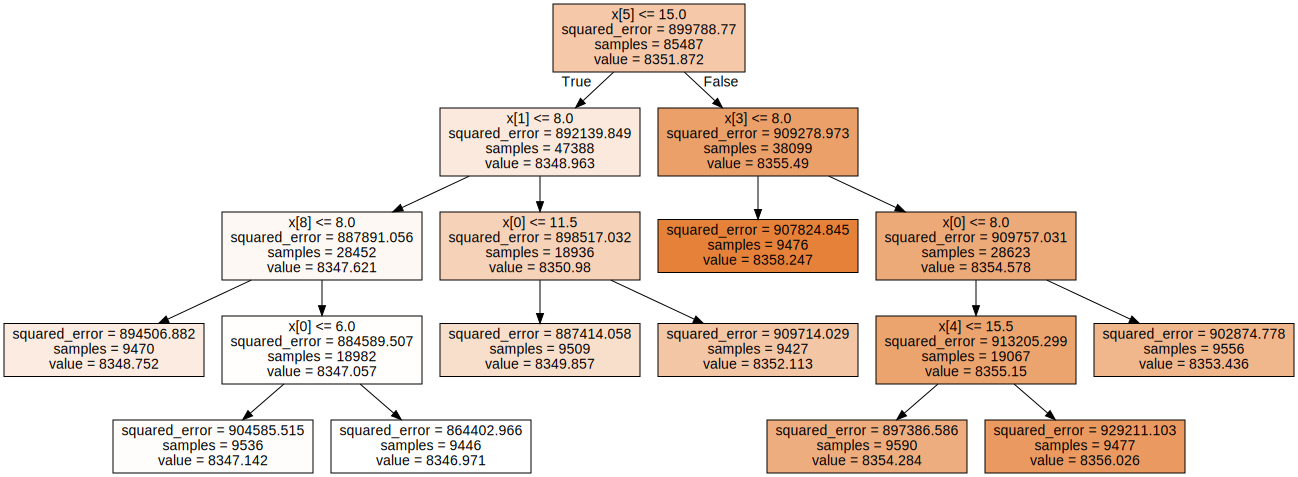

In [ ]:
# DOT data
dot_data = tree.export_graphviz(reg, out_file=None, 
                                
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
max_arg_cpu_per_logs_seq = df.groupby('logs_seq').idxmax()['cpu']
max_arg_cpu_per_logs_seq.index = pd.MultiIndex.from_tuples(max_arg_cpu_per_logs_seq.index)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19492\1268036261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.idxmax is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  max_arg_cpu_per_logs_seq = df.groupby('logs_seq').idxmax()['cpu']


In [127]:
from tqdm import tqdm
df['max_cpu_log'] = np.zeros(len(df))
for i, row in tqdm(df.iterrows()):
    df.loc[i, 'max_cpu_log'] = df.loc[max_arg_cpu_per_logs_seq.loc[row['logs_seq']],'new_log']

280605it [01:25, 3278.98it/s]


In [15]:
def generate(name):
    window_size = 10
    hdfs = {}
    length = 0
    with open('C:/Users/Administrator/Repositories/logdeep_measurable/data/hdfs/' + name, 'r') as f:
        for ln in f.readlines():
            ln = list(map(lambda n: n - 1, map(int, ln.strip().split())))
            ln = ln + [-1] * (window_size + 1 - len(ln))
            hdfs[tuple(ln)] = hdfs.get(tuple(ln), 0) + 1
            length += 1
    print('Number of sessions({}): {}'.format(name, len(hdfs)))
    return hdfs, length

In [21]:
group_df = df.groupby(['logs_seq', 'new_log']).mean()['max_cpu_log']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19492\597158971.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby(['logs_seq', 'new_log']).mean()['max_cpu_log']


KeyError: 'max_cpu_log'

In [20]:
window_size = 10
test_normal_loader, test_normal_length = generate('hdfs_test_normal')
with open('C:/Users/Administrator/Repositories/logdeep_measurable/data/hdfs/hdfs_test_normal_one', 'w') as f:
    for line in test_normal_loader.keys():
        if len(line) == 13:
            break
    print(line)
    for l in test_normal_loader.keys():
        print(test_normal_loader[l])
        for p in range(test_normal_loader[l]):
            f.write(' '.join([str(x) for x in line]))
            f.write('\n')

Number of sessions(hdfs_test_normal): 14177
(4, 4, 21, 4, 10, 8, 10, 8, 10, 8, 25, 25, 25)
93992
18128
19151
50336
16386
4592
1
1
30960
935
189
363
47522
8927
922
1971
1472
122
2688
1091
5
181
103
21267
4
179
3369
2289
24
5907
231
3
1206
4
1627
2
2011
5037
663
17
42
1
2395
1
223
433
1765
1221
1
1157
25
3
70
1287
142
7
19
383
148
109
478
43
303
286
81
1330
495
1
49
538
1
129
120
16
16
5908
231
645
17
12
193
40
6
6
714
941
7
425
809
1779
5626
83
533
327
630
181
24
82
52
199
536
28
28
99
419
1
42
706
569
252
16
75
3249
2141
14
30
45
519
949
225
981
767
47
230
220
586
24
186
555
15
2172
182
1683
101
26
63
2
1407
1096
570
620
36
363
1047
11
1204
1
1098
1752
1330
222
63
1
4
54
610
356
23
427
3
119
5413
546
52
6
6
3860
472
177
4
383
15
667
568
10
366
114
67
786
35
87
14
106
16
680
466
101
18
1591
63
136
3
2
141
217
25
269
211
9
1
1287
41
28
1
5
142
2030
2
505
97
2838
73
330
226
97
87
20
1
91
1182
73
2212
90
3
78
48
58
188
248
70
564
11
3
340
17
63
44
1
24
92
802
198
177
96
72
169
35
30
94
1
6

In [21]:
window_size = 10
test_normal_loader, test_normal_length = generate('hdfs_test_abnormal')
with open('C:/Users/Administrator/Repositories/logdeep_measurable/data/hdfs/hdfs_test_abnormal_one', 'w') as f:
    for line in test_normal_loader.keys():
        if len(line) == 11:
            break
    print(line)
    for l in test_normal_loader.keys():
        for p in range(test_normal_loader[l]):
            f.write(' '.join([str(x) for x in line]))
            f.write('\n')

Number of sessions(hdfs_test_abnormal): 4123
(4, 21, 4, -1, -1, -1, -1, -1, -1, -1, -1)


In [42]:
df[(df['new_log']!=df['max_cpu_log'])&(df['dataset_type'] == 'normal')]

,Unnamed: 0,start_time,logs_seq,new_log,dataset_type,end_time,cpu,time,max_cpu_log
36,27,1.671787e+09,"(21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, ...",1,normal,1.671787e+09,0.013765,0.137006,22.0
91,82,1.671787e+09,"(4.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 2...",3,normal,1.671787e+09,0.013765,0.246003,22.0
138,129,1.671787e+09,"(21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, ...",3,normal,1.671787e+09,0.013765,0.337009,22.0
142,133,1.671787e+09,"(8.0, 10.0, 8.0, 25.0, 25.0, 25.0, 3.0, 2.0, 3...",22,normal,1.671787e+09,0.013765,0.344011,1.0
169,160,1.671787e+09,"(4.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 2...",1,normal,1.671787e+09,0.013765,0.395008,22.0
...,...,...,...,...,...,...,...,...,...
231533,2847,1.671788e+09,"(4.0, 25.0, 10.0, 8.0, 25.0, 25.0, 10.0, 8.0, ...",2,normal,1.671788e+09,0.003197,506.195000,3.0
231536,2850,1.671788e+09,"(8.0, 25.0, 25.0, 10.0, 8.0, 10.0, 8.0, 2.0, 2...",1,normal,1.671788e+09,0.003197,506.200002,2.0
231537,2851,1.671788e+09,"(25.0, 25.0, 10.0, 8.0, 10.0, 8.0, 2.0, 2.0, 3...",3,normal,1.671788e+09,0.003197,506.202001,2.0
231540,2854,1.671788e+09,"(8.0, 10.0, 8.0, 2.0, 2.0, 3.0, 1.0, 3.0, 2.0,...",3,normal,1.671788e+09,0.003197,506.208000,2.0


In [83]:
test_normal_loader, test_normal_length = generate('hdfs_test_normal_good')

Number of sessions(hdfs_test_normal_good): 32913


{(3, 3, 3, 20, 9, 7, 9, 7, 9, 7, 24): 490,
 (3, 3, 20, 9, 7, 9, 7, 9, 7, 24, 24): 488,
 (3, 20, 9, 7, 9, 7, 9, 7, 24, 24, 24): 466,
 (20, 9, 7, 9, 7, 9, 7, 24, 24, 24, 21): 5,
 (9, 7, 9, 7, 9, 7, 24, 24, 24, 21, 21): 18,
 (7, 9, 7, 9, 7, 24, 24, 24, 21, 21, 21): 18,
 (9, 7, 9, 7, 24, 24, 24, 21, 21, 21, 19): 26,
 (7, 9, 7, 24, 24, 24, 21, 21, 21, 19, 19): 26,
 (9, 7, 24, 24, 24, 21, 21, 21, 19, 19, 19): 43,
 (3, 3, 20, 3, 9, 7, 9, 7, 9, 7, 24): 412,
 (3, 20, 3, 9, 7, 9, 7, 9, 7, 24, 24): 411,
 (20, 3, 9, 7, 9, 7, 9, 7, 24, 24, 24): 400,
 (3, 20, 3, 3, 9, 7, 9, 7, 9, 7, 24): 437,
 (20, 3, 3, 9, 7, 9, 7, 9, 7, 24, 24): 436,
 (3, 3, 9, 7, 9, 7, 9, 7, 24, 24, 24): 736,
 (3, 9, 7, 9, 7, 9, 7, 24, 24, 24, 21): 13,
 (20, 3, 3, 3, 9, 7, 9, 7, 9, 7, 24): 355,
 (3, 3, 3, 9, 7, 9, 7, 9, 7, 24, 24): 351,
 (20, 9, 7, 9, 7, 9, 7, 24, 24, 24, 0): 137,
 (9, 7, 9, 7, 9, 7, 24, 24, 24, 0, 21): 7,
 (7, 9, 7, 9, 7, 24, 24, 24, 0, 21, 21): 7,
 (9, 7, 9, 7, 24, 24, 24, 0, 21, 21, 21): 12,
 (7, 9, 7, 24, 24,

In [26]:
np.load(r'C:\Users\Administrator\Downloads\x_data.npy',allow_pickle=True)

array([list(['E5', 'E5', 'E5', 'E22', 'E11', 'E9', 'E11', 'E11', 'E9', 'E9', 'E26', 'E26', 'E26']),
       list(['E5', 'E22', 'E5', 'E5', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E26']),
       list(['E5', 'E5', 'E5', 'E22', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E26', 'E23', 'E23', 'E23', 'E21', 'E21', 'E21']),
       ...,
       list(['E5', 'E22', 'E5', 'E5', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E11', 'E9', 'E26', 'E4', 'E4', 'E3', 'E2', 'E23', 'E23', 'E23', 'E21', 'E21', 'E21']),
       list(['E5', 'E5', 'E22', 'E5', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E11', 'E9', 'E26', 'E23', 'E23', 'E23', 'E21', 'E21', 'E21']),
       list(['E5', 'E5', 'E5', 'E22', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E26', 'E23', 'E23', 'E23', 'E21', 'E21', 'E21'])],
      dtype=object)